In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Step 1: Import the data from the given .csv file (diabetes.csv) 
The first few columns contain the data while the last column is a binary class label of 0 or 1

In [3]:
# Step 1: Import the data
data = pd.read_csv('diabetes.csv', header=None)

In [4]:
# Assign column names
column_names = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'target']
data.columns = column_names

In [5]:
# Display the first few rows of the dataset
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [6]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  759 non-null    float64
 1   feature_2  759 non-null    float64
 2   feature_3  759 non-null    float64
 3   feature_4  759 non-null    float64
 4   feature_5  759 non-null    float64
 5   feature_6  759 non-null    float64
 6   feature_7  759 non-null    float64
 7   feature_8  759 non-null    float64
 8   target     759 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.5 KB


In [7]:
# Display summary statistics of the dataset
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 2: Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [9]:
# Check for missing values
print("Missing values:")
data.isnull().sum()

Missing values:


feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
feature_8    0
target       0
dtype: int64

In [10]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [11]:
# Remove duplicate rows if any
data = data.drop_duplicates()

In [12]:
# Descriptive statistics
print("\nDescriptive statistics:")
data.describe()


Descriptive statistics:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Correlation matrix
correlation_matrix = data.corr()

# Data Visualization

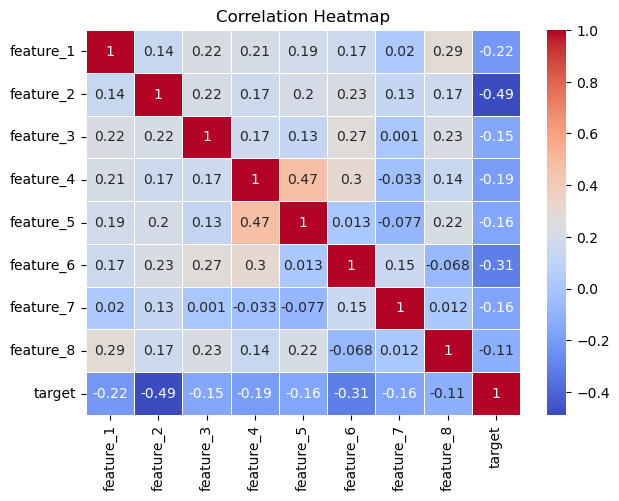

In [15]:
# 1. Correlation Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* Strong positive correlation between feature_4 and feature_5
* Moderate negative correlation between feature_2 and target
* The target variable shows some correlation with features, particularly feature_2 (negative) and feature_8 (negative)

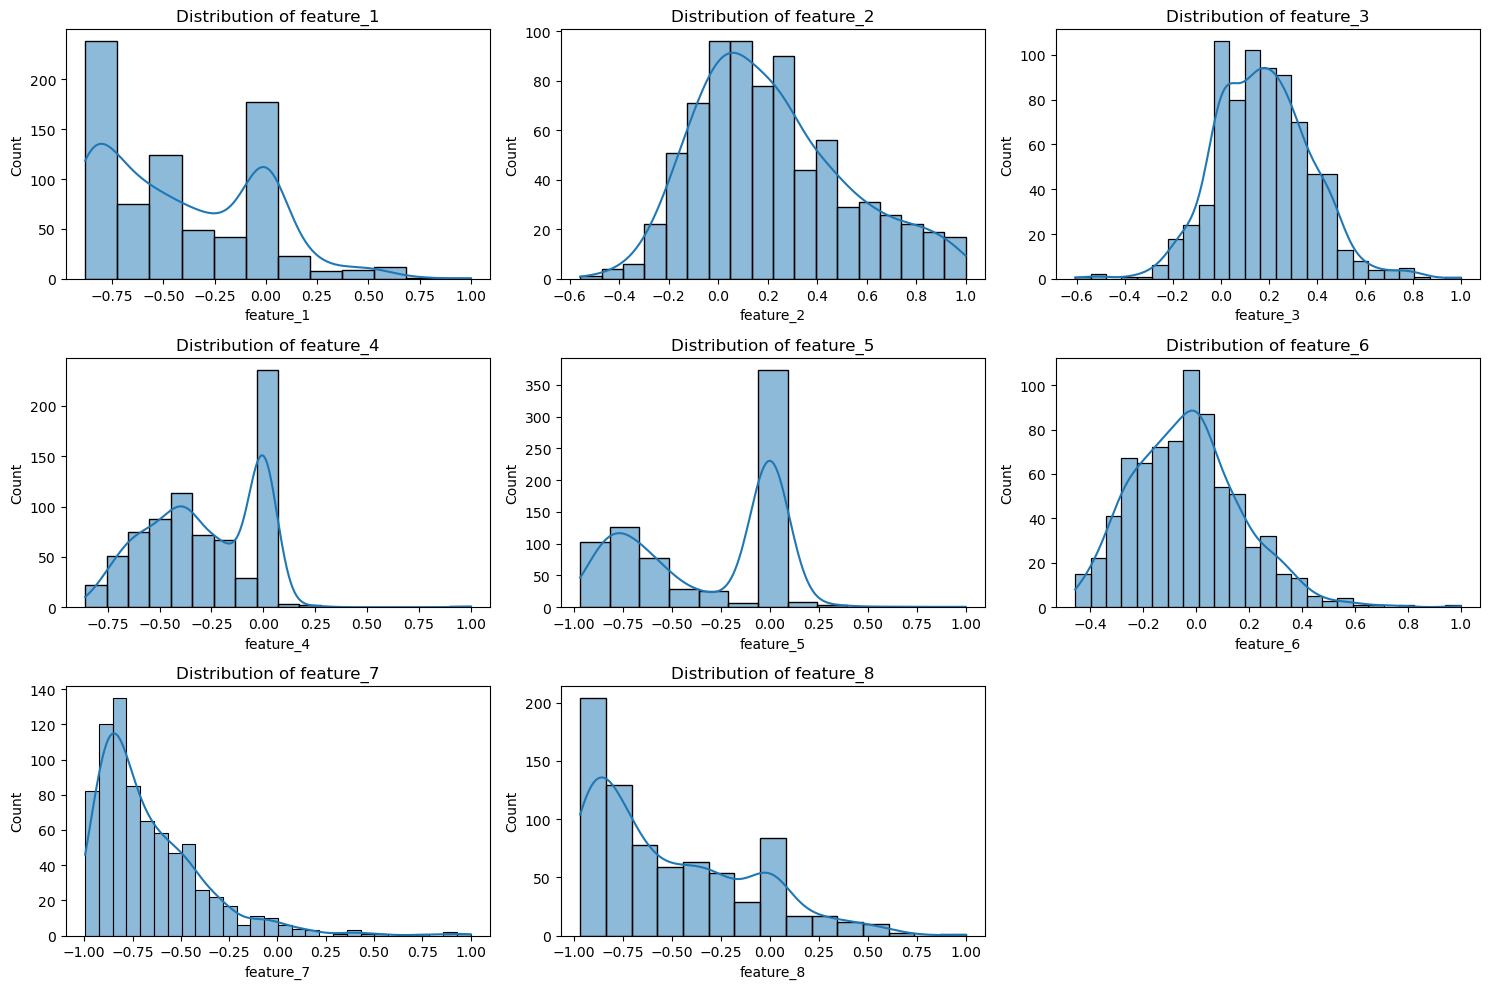

In [17]:
# 2. Distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

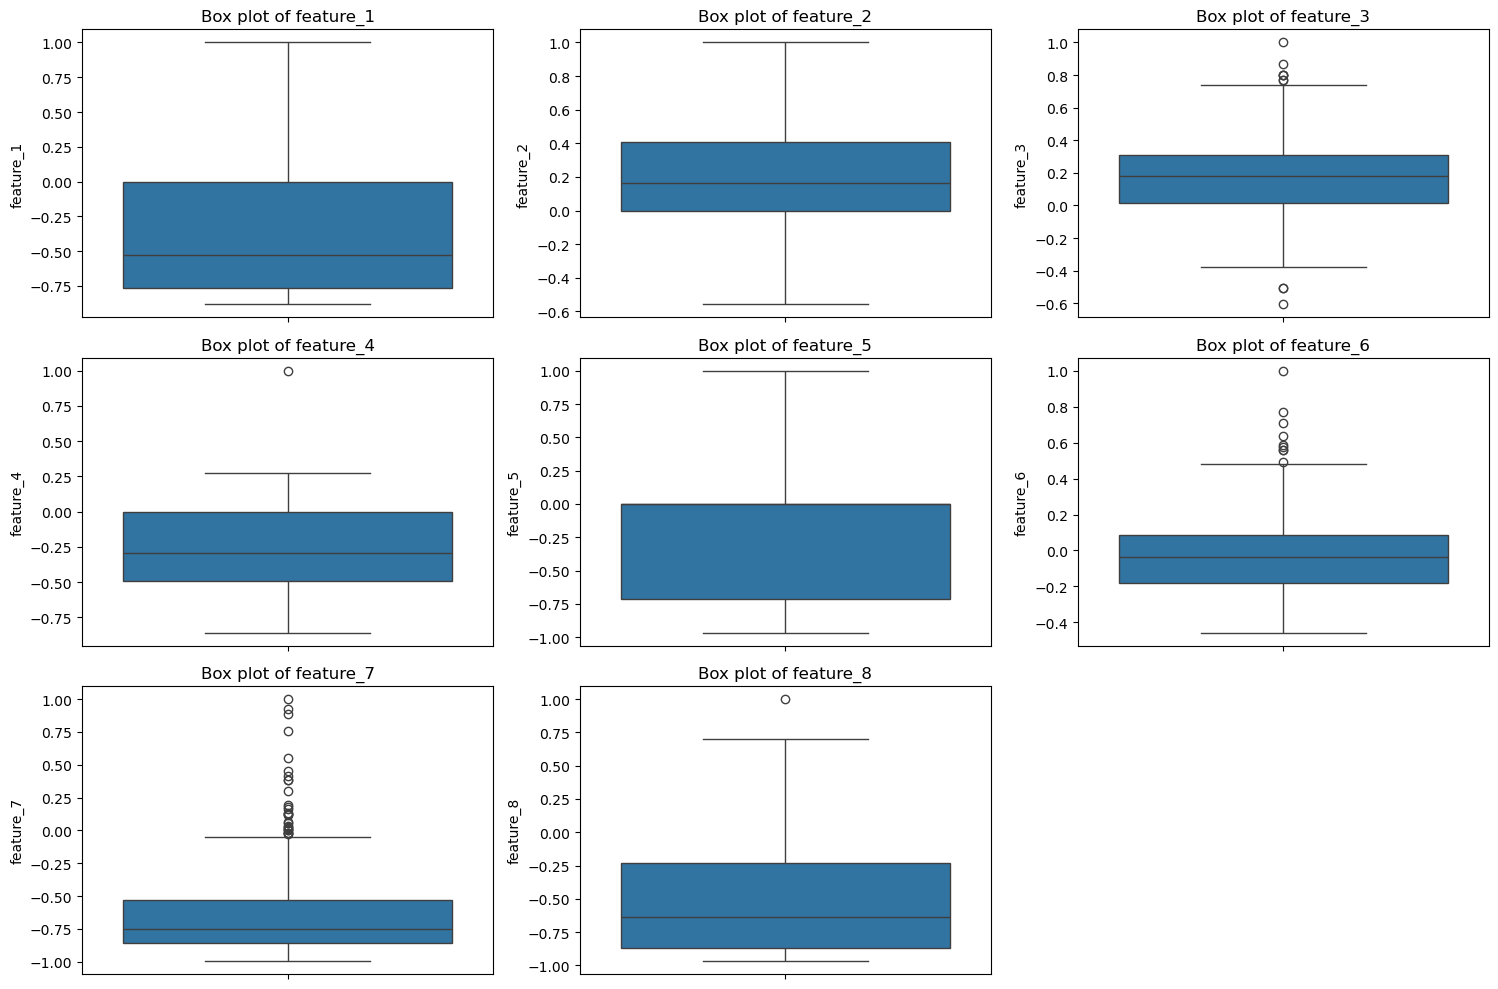

In [18]:
# 3. Box plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=column)
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

Distribution and Outliers

* Most features show a roughly normal distribution, but with some skewness.
* There are visible outliers in several features, particularly in features 3, 4 and 7.

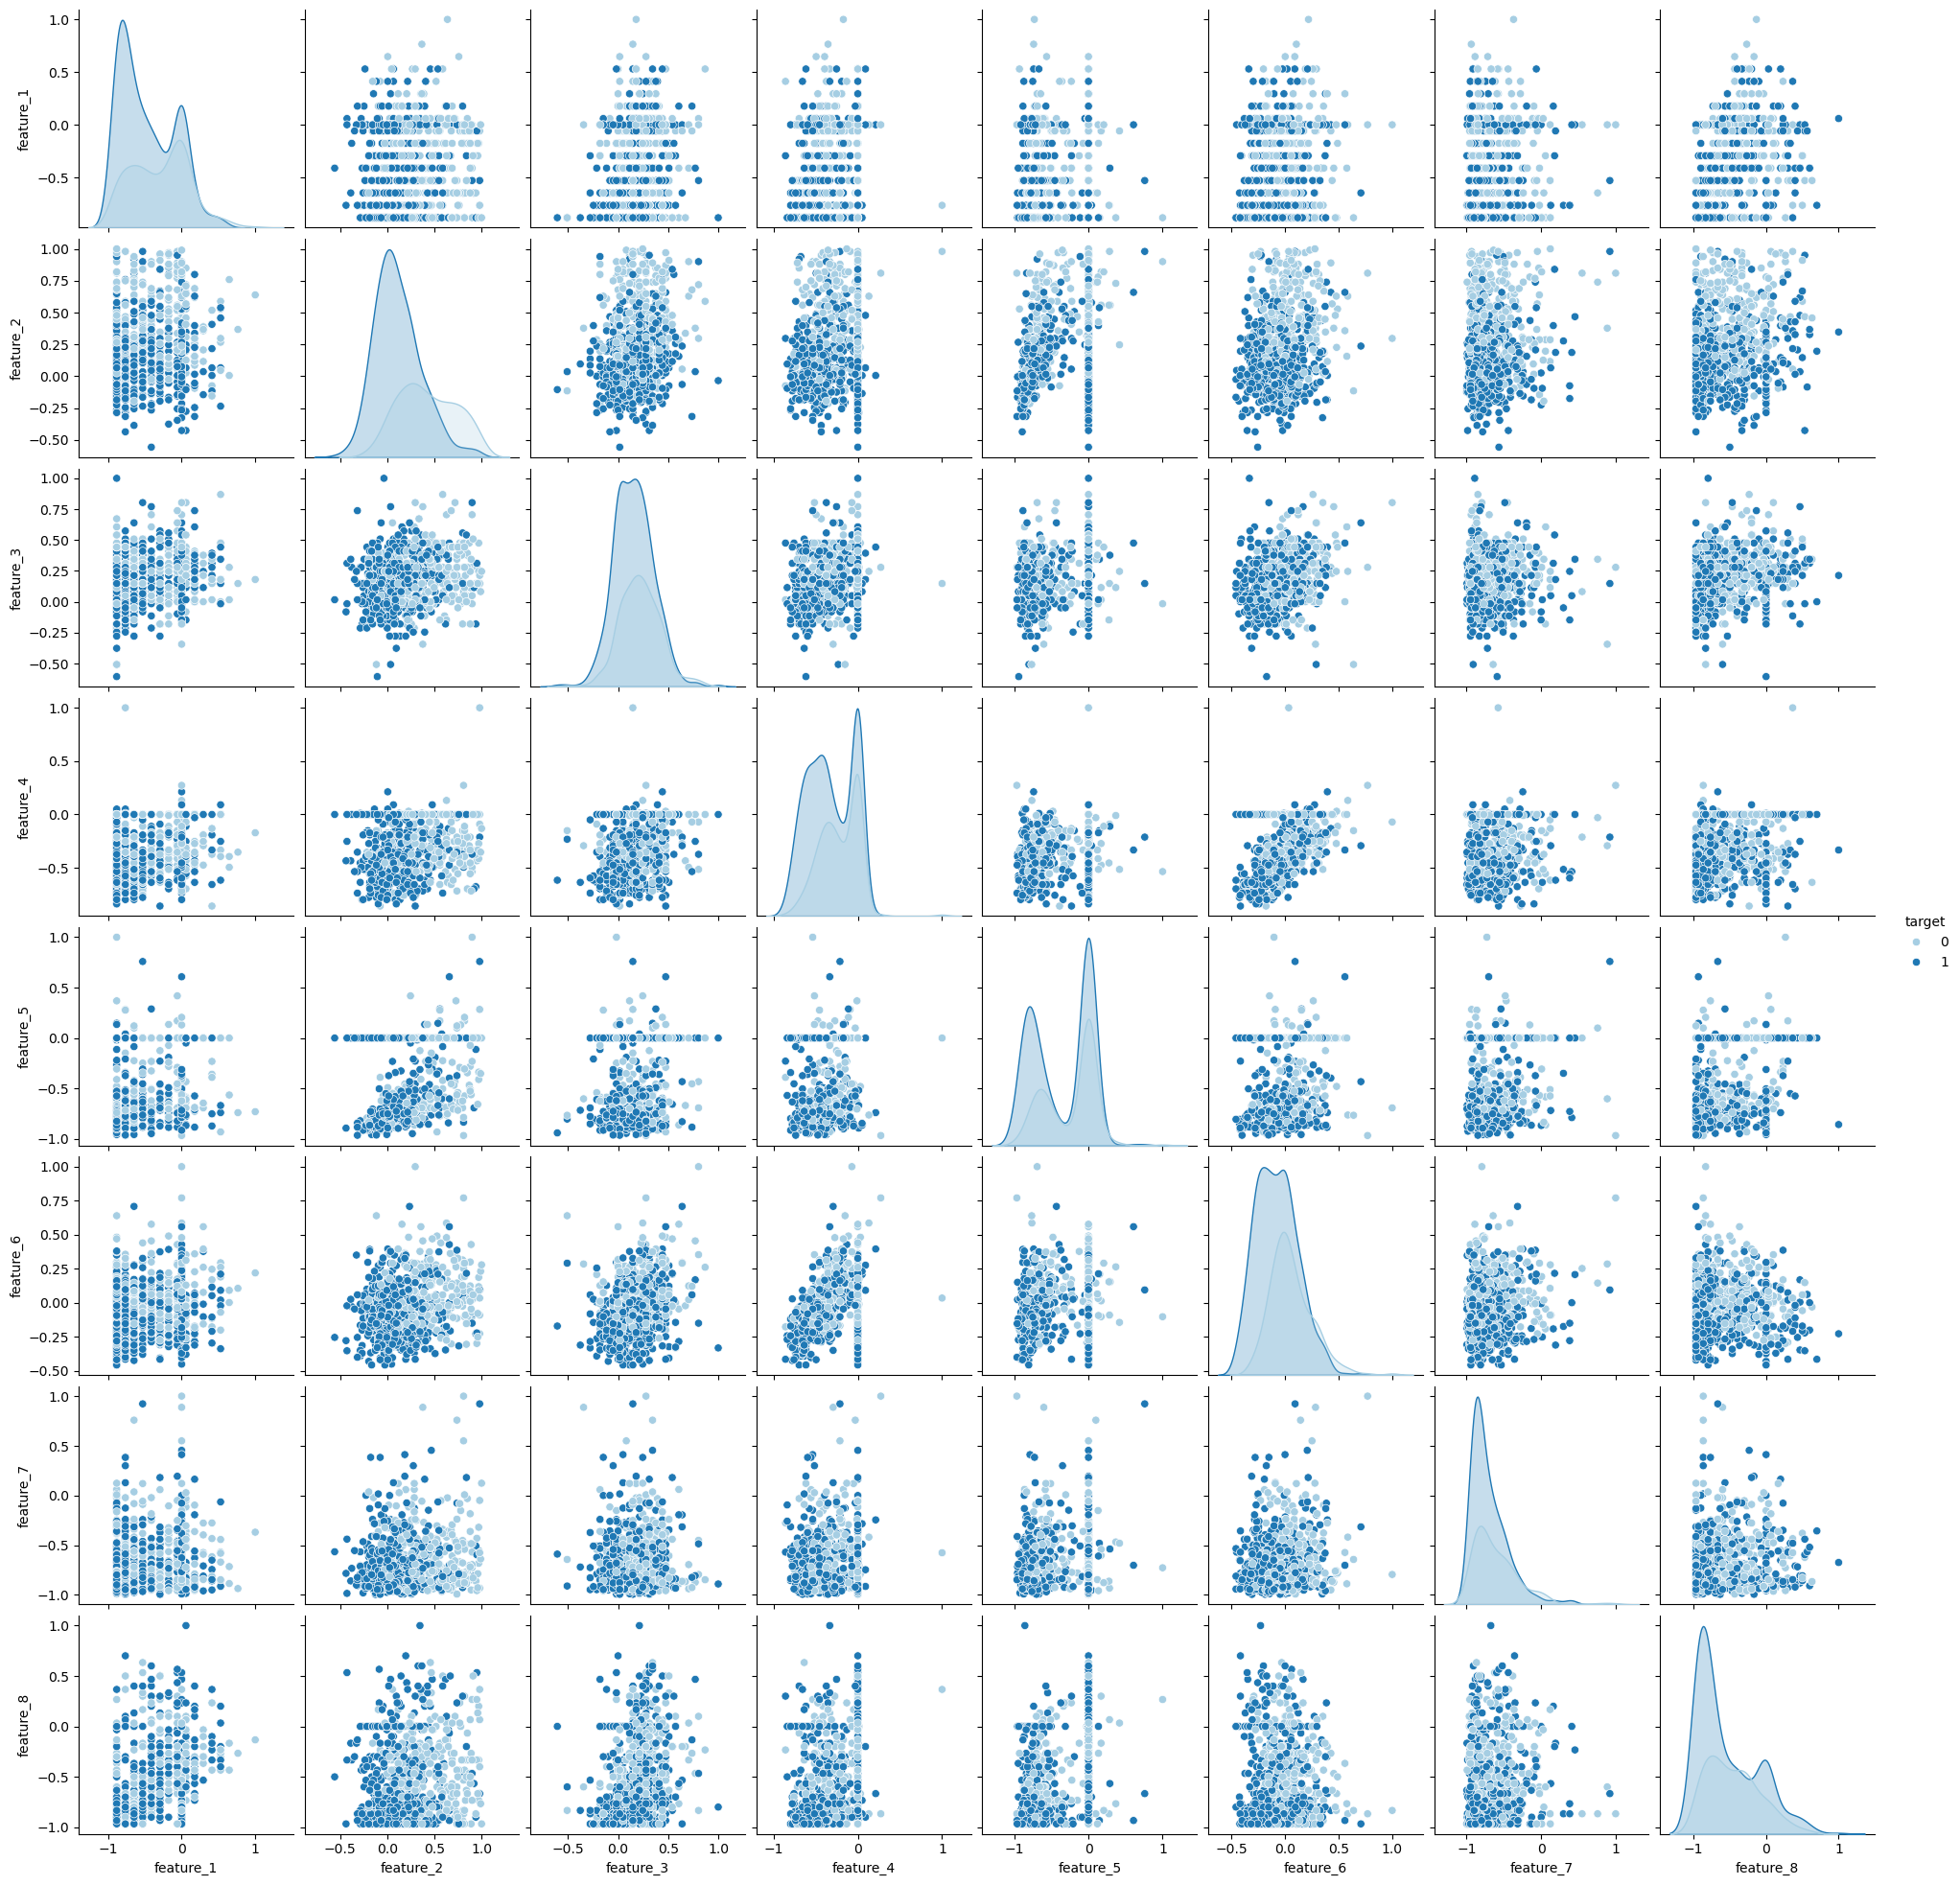

In [20]:
import seaborn as sns

sns.pairplot(data, hue = 'target', diag_kind = 'kde',palette = 'Paired' )

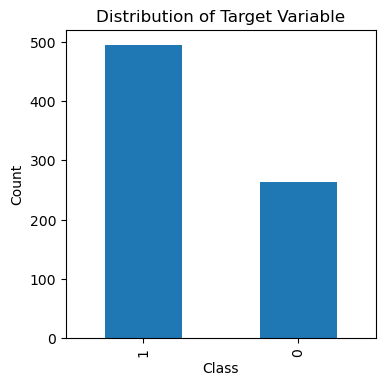

In [21]:
# 5. target distribution
plt.figure(figsize=(4, 4))
data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [22]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, :-1])
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['target'] = data['target']

In [23]:
print("\nScaled data statistics:")
scaled_data.describe()


Scaled data statistics:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,759.000000
mean,4.446743e-17,3.042508e-17,1.287215e-17,2.808469e-17,4.446743e-17,9.361564e-18,-1.521254e-16,1.766995e-16,0.653491
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,0.476171
min,-1.229765e+00,-2.535302e+00,-3.892835e+00,-2.202204e+00,-1.714293e+00,-2.072107e+00,-1.172354e+00,-1.124774e+00,0.000000
25%,-9.249842e-01,-7.301631e-01,-7.959623e-01,-7.944485e-01,-1.046579e+00,-7.142464e-01,-6.893215e-01,-8.751048e-01,0.000000
50%,-3.154225e-01,-1.722117e-01,1.900567e-02,-1.236404e-02,8.620762e-01,-9.901438e-03,-2.968577e-01,-2.925411e-01,1.000000
75%,1.056092e+00,6.154849e-01,6.709766e-01,1.121658e+00,8.620762e-01,5.855237e-01,4.654304e-01,7.061368e-01,1.000000
max,3.646731e+00,2.551906e+00,4.093840e+00,4.992980e+00,3.526634e+00,5.029431e+00,5.879932e+00,3.785393e+00,1.000000


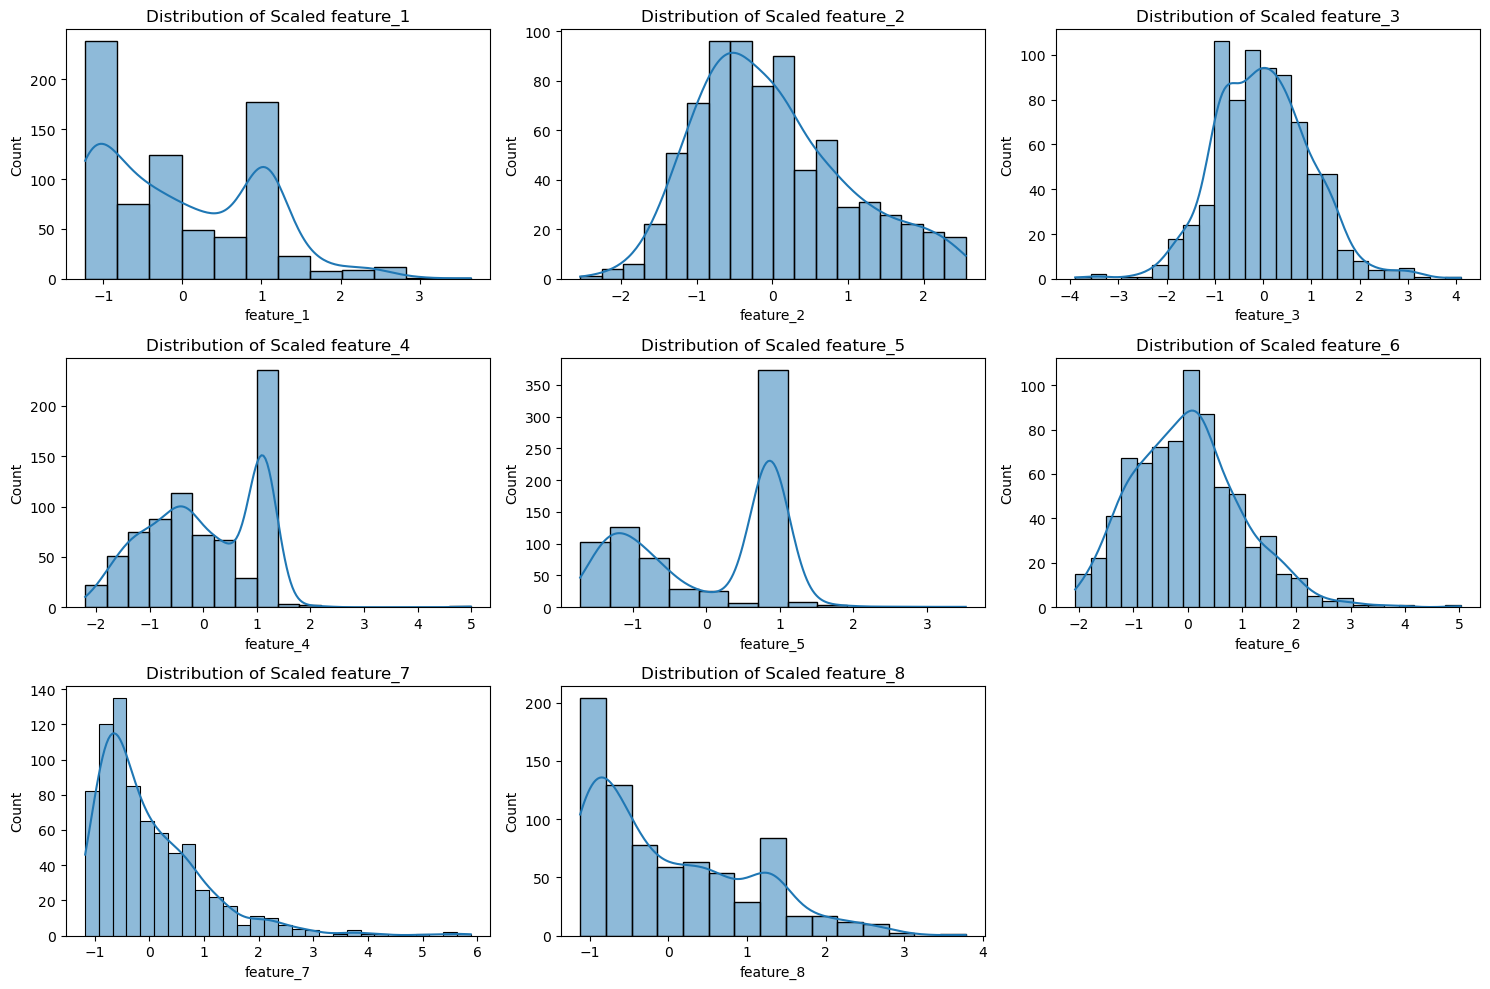

In [24]:
# Visualization of scaled features
plt.figure(figsize=(15, 10))
for i, column in enumerate(scaled_data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=scaled_data, x=column, kde=True)
    plt.title(f'Distribution of Scaled {column}')
plt.tight_layout()
plt.show()

#### Step 3. Split into 70% train 30% test

In [26]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

In [27]:
# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Training set target shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test set target shape:", y_test.shape)

Training set shape: (531, 8)
Training set target shape: (531,)
Test set shape: (228, 8)
Test set target shape: (228,)


#### Step 4. Modify the model shown in the demo to take the new data

## PART 1: TensorFlow

In [31]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

### Hypothesis 1: dense layer with 1 neuron and sigmoid activation for binary classification

In [33]:
# Create a dense layer with 1 neuron and sigmoid activation for binary classification
model = Sequential([tf.keras.layers.Dense(1,"sigmoid")])

### Step 5. Train the model on the data

In [35]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score  
model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3729 - loss: 0.7967 - val_accuracy: 0.3684 - val_loss: 0.7719
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.4127 - loss: 0.7452 - val_accuracy: 0.3991 - val_loss: 0.7382
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.4364 - loss: 0.7278 - val_accuracy: 0.4430 - val_loss: 0.7087
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.4866 - loss: 0.7019 - val_accuracy: 0.5351 - val_loss: 0.6826
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5455 - loss: 0.6819 - val_accuracy: 0.6053 - val_loss: 0.6594
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6073 - loss: 0.6593 - val_accuracy: 0.6360 - val_loss: 0.6395
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.6546 - loss: 0.6418 - val_accuracy: 0.6535 - val_loss: 0.6225
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7076 - loss: 0.6214 - val_accuracy: 0.71

### Step 6. Make predictions on the test data and compare them to the test labels

In [37]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


### Step 7. Calculate the accuracy of your results

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8026


In [40]:
# Details of the model after compiling
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

### Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

### Hypothesis 2: 2 Hidden Layers with (16 and 8 neurons and ReLu Activation)

In [43]:
# Model with two hidden layers (16 and 8 units, ReLU activation) and an output layer with 1 unit (sigmoid activation)

sample_model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),  # First hidden layer with 16 units, ReLU activation 
    Dense(8, activation='relu'),                                    # Second hidden layer with 8 units, ReLU activation 
    Dense(1, activation='sigmoid')                                  # Output layer with 1 unit, sigmoid activation for binary classification
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 9. Test your hypothesis by training your new models

In [45]:
from tensorflow.keras.optimizers import Adam

# steps 5-7 
# Compile the model with an optimizer
sample_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
sample_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)
y_pred1 = (sample_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3405 - loss: 0.7375 - val_accuracy: 0.5351 - val_loss: 0.7000
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5906 - loss: 0.6868 - val_accuracy: 0.6711 - val_loss: 0.6637
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.6384 - loss: 0.6570 - val_accuracy: 0.6754 - val_loss: 0.6362
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.6874 - loss: 0.6115 - val_accuracy: 0.6754 - val_loss: 0.6139
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6487 - loss: 0.6103 - val_accuracy: 0.6754 - val_loss: 0.5901
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.6576 - loss: 0.5918 - val_accuracy: 0.6754 - val_loss: 0.5705
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.6311 - loss: 0.5930 - val_accuracy: 0.6798 - val_loss: 0.5524
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.6614 - loss: 0.5413 - val_accuracy: 0.69

In [46]:
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy1: {accuracy1:.4f}')

Accuracy1: 0.7807


In [47]:
# The details of the model after compiling
sample_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

### Hypothesis 3: 2 Hidden Layers with (32 and 16 neurons and ReLu Activation)

In [49]:
sample_model1 = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),  # doubling the nuerons in first hidden layer 
    Dense(16, activation='relu'),                                   # doubling the nuerons in secong layer 
    Dense(1, activation='sigmoid') 
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 9. Test your hypothesis by training your new models

In [51]:
from tensorflow.keras.optimizers import Adam

# Repeating steps 5-7 
# Compile the model with an optimizer
sample_model1.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
sample_model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)
y_pred2 = (sample_model1.predict(X_test) > 0.5).astype("int32")

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5784 - loss: 0.6883 - val_accuracy: 0.6754 - val_loss: 0.6474
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.6622 - loss: 0.6458 - val_accuracy: 0.6754 - val_loss: 0.6136
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.6268 - loss: 0.6235 - val_accuracy: 0.6754 - val_loss: 0.5830
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.6290 - loss: 0.6018 - val_accuracy: 0.6798 - val_loss: 0.5572
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.6312 - loss: 0.5846 - val_accuracy: 0.7325 - val_loss: 0.5372
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.7221 - loss: 0.5399 - val_accuracy: 0.7895 - val_loss: 0.5150
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7421 - loss: 0.5156 - val_accuracy: 0.7895 - val_loss: 0.4983
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7558 - loss: 0.4964 - val_accuracy: 0.78

In [52]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy2: {accuracy2:.4f}')

Accuracy2: 0.7719


In [53]:
# the details of the model after compiling
sample_model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501 (9.77 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,668 (6.52 KB)

In [54]:
print(f'Accuracy of initial model: {accuracy:.4f}')
print(f'Accuracy of model 1: {accuracy1:.4f}')
print(f'Accuracy of model 2: {accuracy2:.4f}')

Accuracy of initial model: 0.8026
Accuracy of model 1: 0.7807
Accuracy of model 2: 0.7719


### Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why. 

These results show:

The initial model (Hypothesis 1: dense layer with 1 neuron and sigmoid activation) performed the best with an accuracy of 0.8026.
Model 1 (Hypothesis 2: 2 Hidden Layers with 16 and 8 neurons and ReLU Activation) showed a decrease in accuracy to 0.7807.
Model 2 (Hypothesis 3: 2 Hidden Layers with 32 and 16 neurons and ReLU Activation) further decreased in accuracy to 0.7719.

This trend suggests that:

1. The simplest (initial) model performed best, indicating that the problem might be relatively simple or linearly separable.
2. Adding complexity (more layers and neurons) actually decreased performance, which could be due to overfitting. The model may have performed well with the trained or memorized data than unseen data
3. The data might not require complex patterns to be learned, and simpler models generalize better in this case.
4. There's a clear case of diminishing returns (and negative returns) as model complexity increases.

This underscores the importance of not automatically assuming that more complex models will perform better. Sometimes, simpler models can capture the essential patterns in the data more effectively, especially if the underlying relationship is not highly complex.

## PART 2: PyTorch

In [56]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import pandas as pd

In [57]:
# Convert DataFrame to NumPy arrays first, then to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

## Hypothesis 1: neural network model using PyTorch with two hidden layers and an output layer

### Step 5. Train the model on the data

In [60]:
class Model_py(nn.Module):
    def __init__(self):
        super(Model_py, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)  # Input layer (number of features) to first hidden layer with 16 neurons
        self.fc2 = nn.Linear(16, 8)                 # First hidden layer with 16 neurons to second hidden layer with 8 neurons
        self.fc3 = nn.Linear(8, 1)                  # Second hidden layer with 8 neurons to output layer with 1 neuron
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))                 # Apply ReLU activation to the first hidden layer
        x = torch.relu(self.fc2(x))                 # Apply ReLU activation to the second hidden layer
        x = torch.sigmoid(self.fc3(x))              # Apply Sigmoid activation to the output layer (binary classification)
        return x

model = Model_py()

In [61]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.6559
Epoch [20/50], Loss: 0.6054
Epoch [30/50], Loss: 0.5487
Epoch [40/50], Loss: 0.4881
Epoch [50/50], Loss: 0.4603


### Step 6. Make predictions on the test data and compare them to the test labels

In [63]:
# Evaluate the model on the test data
with torch.no_grad():
    y_pred_prob = model(X_test_tensor)
    y_pred = (y_pred_prob >= 0.5).float()

### Step 7. Calculate the accuracy of your results

In [65]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score 

# Calculate accuracy
accuracy = accuracy_score(y_test_tensor, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7763


### Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

## Hypothesis 2: 2 Hidden Layers with (32 and 16 neurons and ReLu Activation)

In [68]:
# # step 8 - modified model    
class ModifiedDiabetesModel(nn.Module):
    def __init__(self):
        super(ModifiedDiabetesModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)  # Doubling the width of the first hidden layer
        self.fc2 = nn.Linear(32, 16)                # Doubling the width of the second hidden layer
        self.fc3 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.5)              # Dropout layer to reduce overfitting
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)                         # Apply dropout after first hidden layer
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)                         # Apply dropout after second hidden layer
        x = torch.sigmoid(self.fc3(x))
        return x

modified_model = ModifiedDiabetesModel()

# Use the same criterion and optimizer
optimizer = optim.Adam(modified_model.parameters(), lr=0.01)

# Train the modified model
num_epochs = 50
for epoch in range(num_epochs):
    outputs = modified_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.6314
Epoch [20/50], Loss: 0.5604
Epoch [30/50], Loss: 0.5386
Epoch [40/50], Loss: 0.4994
Epoch [50/50], Loss: 0.4946


### Step 9. Test your hypothesis by training your new models

In [70]:
## Evaluate the modified model on the test data

with torch.no_grad():
    y_pred_prob_mod = modified_model(X_test_tensor)
    y_pred_mod = (y_pred_prob_mod >= 0.5).float()

# Calculate accuracy of the modified model
accuracy_mod = accuracy_score(y_test_tensor, y_pred_mod)
print(f'Modified Model Accuracy: {accuracy_mod:.4f}')

Modified Model Accuracy: 0.7412


## Hypothesis 3: 2 Hidden Layers with (32 and 16 neurons and ReLu Activation) without dropouts

In [124]:
# Define a modified model without dropout
class ModifiedDiabetesModel1(nn.Module):
    def __init__(self):
        super(ModifiedDiabetesModel1, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)  # Doubling the width of the first hidden layer
        self.fc2 = nn.Linear(32, 16)                # Doubling the width of the second hidden layer
        self.fc3 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize the modified model
modified_model1 = ModifiedDiabetesModel1()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Assuming binary classification
optimizer = optim.Adam(modified_model1.parameters(), lr=0.01)

# Train the modified model
num_epochs = 50
for epoch in range(num_epochs):
    outputs = modified_model1(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.6092
Epoch [20/50], Loss: 0.5161
Epoch [30/50], Loss: 0.4617
Epoch [40/50], Loss: 0.4483
Epoch [50/50], Loss: 0.4329


In [136]:
## Evaluate the modified model on the test data

with torch.no_grad():
    y_pred_prob_mod = modified_model1(X_test_tensor)
    y_pred_mod = (y_pred_prob_mod >= 0.5).float()

# Calculate accuracy of the modified model1
accuracy_mod = accuracy_score(y_test_tensor, y_pred_mod)
print(f'Modified Model Accuracy: {accuracy_mod:.4f}')

Accuracy: 0.7763


### Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why. 

Hypothesis 1: Neural network model using PyTorch with two hidden layers and an output layer

Architecture: 16 neurons in the first hidden layer, 8 neurons in the second hidden layer, 1 neuron in the output layer
Activation functions: ReLU for hidden layers, Sigmoid for the output layer
Accuracy: 0.7763 (77.63%)

Hypothesis 2: Modified model with 2 hidden layers (32 and 16 neurons and ReLU Activation)

Architecture: 32 neurons in the first hidden layer, 16 neurons in the second hidden layer, and 1 neuron in the output layer
Activation functions: ReLU for hidden layers, Sigmoid for the output layer
Added dropout layers (0.5 dropout rate) after each hidden layer
Accuracy: 0.7412 (74.12%)

Hypothesis 3: Modified model with 2 hidden layers (32 and 16 neurons and ReLU Activation) without dropouts

Architecture: 32 neurons in the first hidden layer, 16 neurons in the second hidden layer, and 1 neuron in the output layer
Activation functions: ReLU for hidden layers, Sigmoid for the output layer
Accuracy: 0.7763 (77.63%)

Comparison and explanation of differences:

1. Increased network capacity (Hypotheses 2 and 3 vs. Hypothesis 1): The larger number of neurons in Hypotheses 2 and 3 provides more capacity to learn complex patterns in the data. However, this increased capacity didn't lead to improved accuracy in this case, suggesting that the original model (Hypothesis 1) was already sufficient for capturing the underlying patterns in the data.
2. b) Effect of dropout (Hypothesis 2 vs. Hypothesis 3): Dropout is a regularization technique used to prevent overfitting by randomly "dropping out" a portion of neurons during training. In this case, adding dropout (Hypothesis 2) led to a decrease in accuracy compared to the same architecture without dropout (Hypothesis 3). This suggests that the model might not have been overfitting in the first place, and the dropout may have been too aggressive, causing underfitting.
3. c) Identical performance (Hypothesis 1 vs. Hypothesis 3): Despite the increased capacity in Hypothesis 3, the accuracy remained the same as Hypothesis 1. This indicates that the additional neurons didn't contribute to learning more meaningful features from the data.
It's possible that the dataset or problem complexity doesn't require the additional capacity provided by the larger network.